In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Make csv files with only the necessary Columns for ML

In [6]:
for year in range(1980, 2022):
    path = "csv_files/years/" + str(year) + ".csv"

    df = pd.read_csv(path)
    artist_id = pd.read_csv('csv_files/artist_id.csv')

    keys = list(artist_id['artist'])
    values = list(artist_id['artist_id'])
    artist_id = dict(zip(keys, values))

    artist = []
    arr = df['spotify_artist'].to_numpy().astype(str)
    arr = np.char.rstrip(arr, "']")
    arr = np.char.lstrip(arr, "['")
    arr = np.char.split(arr, "', '")
    for i, a_list in enumerate(arr):
        if a_list[0] in artist_id:
            artist.append(artist_id[a_list[0]])
        else:
            artist_id[a_list[0]] = len(artist_id) + 1
            artist.append(artist_id[a_list[0]])
    df['spotify_id'] = artist

    df = df[['spotify_id', 'danceability', 'energy', 'key' , 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'weeks']]
    df.columns = ['artist_id', 'danceability', 'energy', 'key' , 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'weeks']
    df.to_csv("final_csv/" + str(year) + ".csv")

CSV file for visualization

In [13]:
mdf = pd.DataFrame(columns= ['year', 'danceability', 'energy', 'key' , 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'])

for year in range(1980, 2022):

    path = f"csv_files/random_sample/{year}.csv"
    df = pd.read_csv(path).iloc[:, 7:-2]
    mdf = mdf.append(df.mean(), ignore_index=True)
mdf['year'] = np.arange(1980, 2022).astype(int)



Save CSV file

In [14]:
mdf.to_csv('csv_files/plot_data_unpopular.csv')

Read csv files to create figures

In [26]:
df = pd.read_csv('csv_files/plot_data.csv').iloc[:, 1:]
df2 = pd.read_csv('csv_files/plot_data_unpopular.csv').iloc[:, 1:]
x = df['year']
y1 = df.iloc[:, 4]
y2 = df2.iloc[:, 4]
# y2 = df.iloc[:, -2]
# y3 = df.iloc[:, -1]



Index(['year', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'accuracy', 'recall', 'precision'],
      dtype='object')

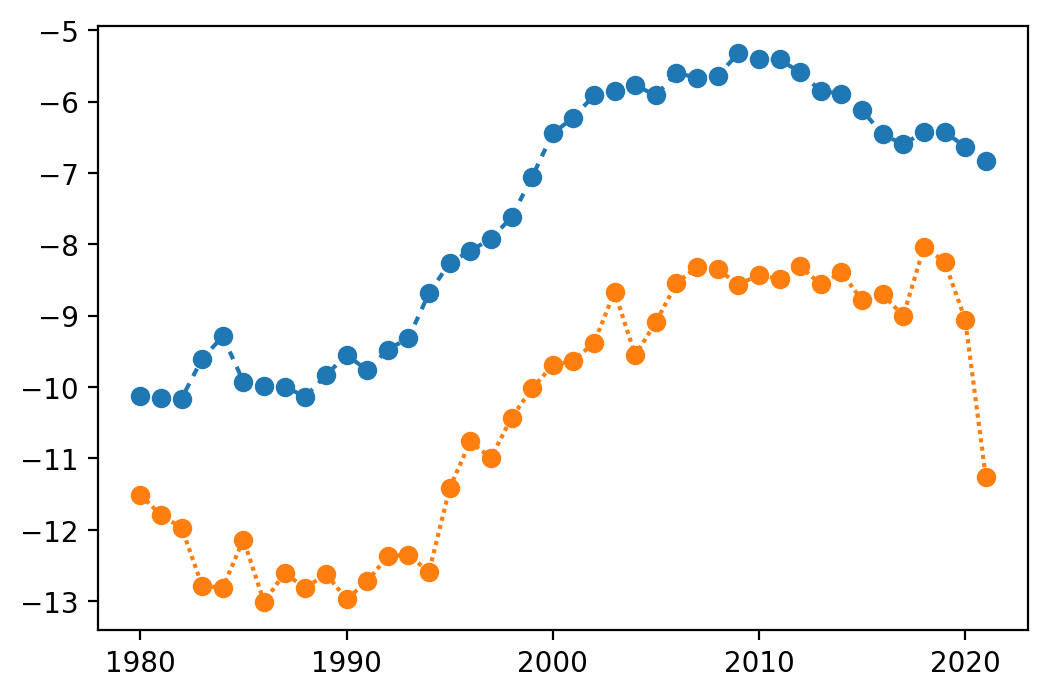

In [29]:
plt.plot(x, y1, dashes=[2,2])
plt.scatter(x, y1, label = '_nolegend_')

plt.plot(x, y2, dashes=[1,1])
plt.scatter(x, y2, label = '_nolegend_')

# plt.plot(x, y3, dashes=[1,1])
# plt.scatter(x, y3, label = '_nolegend_')

# plt.plot(x, y2)
# plt.plot(x, y3)
# plt.legend(['popular','unpopular','average'])

plt.rcParams['figure.dpi'] = 200
# plt.title('ML prediction over the years')
# plt.ylabel('Danceability')
# plt.xlabel('year')


Create figures for feature importances

In [42]:
df = pd.read_csv('csv_files/f_importances.csv').iloc[:, 1:]
df.mean()
df = df[['artist_id', 'acousticness', 'duration_ms', 'loudness', 'danceability']]

In [43]:
y1 = df.iloc[:,0]
y2 = df.iloc[:,1]
y3 = df.iloc[:,2]
y4 = df.iloc[:,3]
y5 = df.iloc[:,4] 


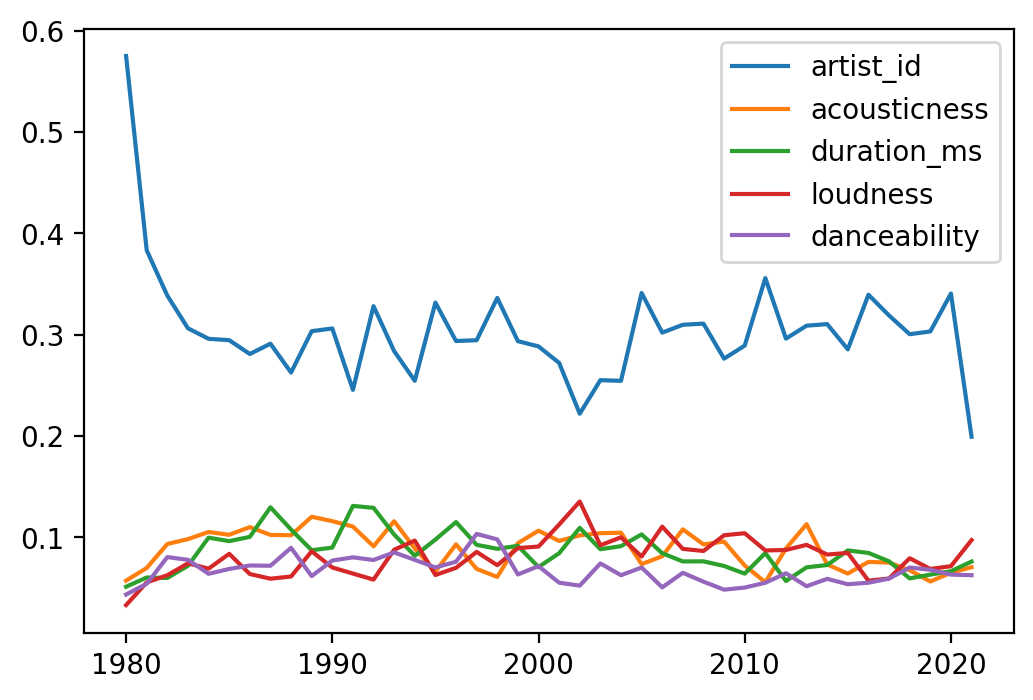

In [49]:
plt.plot(x, y1)
# plt.scatter(x, y1, label = '_nolegend_')

plt.plot(x, y2)
# plt.scatter(x, y2, label = '_nolegend_')

plt.plot(x, y3)
# plt.scatter(x, y3, label = '_nolegend_')

plt.plot(x, y4)
# plt.scatter(x, y4, label = '_nolegend_')

plt.plot(x, y5)
# plt.scatter(x, y5, label = '_nolegend_')

plt.legend(['artist_id', 'acousticness', 'duration_ms', 'loudness', 'danceability'])
